<a href="https://colab.research.google.com/github/ME-UoP-ME421/Rankine-AL/blob/main/mechanics%20/Assignments/Rankine_AL_ME421_ControlSystems_Lab_Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #8: Modeling, Simulation, and Analysis of Rigid Body Motion.

* Save this file in your Institutional G-Suite google drive and rename it starting with your index number. For example if you are E/90/512 then rename the file to
'E90512_xxxx.ipynb'

* Get started!

* Once complete share with smaithri@eng.pdn.ac.lk and chanakatb@eng.pdn.ac.lk

* Submit the link at the end of 'Lesson on Modeling, Simulation, and Analysis of Rigid Body Motion'

* Upload the file through the Assignment Submission Link at the end of the Lesson.

## Setting up Python

In [ ]:
import math
import numpy as np
from numpy import linalg
from scipy.integrate import odeint
import plotly.graph_objects as go

from sympy import symbols
from sympy import *

from sympy.physics.mechanics import dynamicsymbols, init_vprinting

In [ ]:
class mugas_rigid_body_functions:

  def __init__(self):
    self=[];

  def simulateDySystem(self, dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))

    fig.show()
    return [t,sol,fig]

  def hatMatrix(self, X):
    return np.array([[0., -X[2], X[1]],[X[2], 0., -X[0]],[-X[1], X[0], 0.]])

  def qFromAxisAngles(self, theta, unitAxis):
    return np.concatenate(([np.cos(theta/2)],np.sin(theta/2)*np.array(unitAxis)))

  def RfromQuaternions(self,q):
    q0=q[0]; w=q[1:];
    R=np.identity(3)+2*q0*self.hatMatrix(w)+2*self.hatMatrix(w) @ self.hatMatrix(w);
    return R

  def rotationMatrix2EulerAngles(self,R):
    if R[2,2] <1:
      if R[2,2] > -1:
        theta2=math.acos(R[2,2]);
        theta1=math.atan2(R[0,2],R[1,2]);
        theta3=math.atan2(R[2,0],-R[2,1]);
      else: #R[2,2]=-1 No Unique solution
        theta2=np.pi;
        theta1=-math.atan2(R[0,1],-R[0,0]);
        theta3=0;
    else: # R[2,2] = +1 No Unique solution
      theta2 = 0;
      theta1 = math.atan2(R[0,1],R[0,0]) ;
      theta3 = 0;
    return [np.pi-theta1,theta2,np.pi-theta3]

  def Re3equalsgamma(self,gamma):
    theta=math.acos(gamma[2]);
    n1=-gamma[1]/np.sin(theta);
    n2=gamma[0]/np.sin(theta);
    q00=self.qFromAxisAngles(theta,[n1,n2,0]);

    return self.RfromQuaternions(q00)

  def rotate_and_translate(self,objectVertices,R,b):
    #object vertices should be given as an numpy array of shape (3,n)
    #Ex - X=[0, 0, 2, 2, 0, 0, 2, 2], Y=[0, 2, 2, 0, 0, 2, 2, 0], Z=[0, 0, 0, 0, 1, 1, 1, 1]; objectVertices=[X,Y,Z]
    return np.array([[b[0],b[1],b[2]]]).T + R @ objectVertices



  def addOrthNormFrame(self, fig, o, R, axisRange, axisColor):
    e1=[1,0,0]; e2=[0,1,0]; e3=[0,0,1];
    b1=R @ e1; b2=R @ e2; b3=R @ e3;
    fig.add_trace(go.Scatter3d(x=[str(o[0]),str(o[0]+b1[0])], y=[str(o[1]),str(o[1]+b1[1])], z=[str(o[2]),str(o[2]+b1[2])], hoverinfo='x+y+z', mode='lines', line=dict(width=8, color=axisColor)))
    fig.add_trace(go.Scatter3d(x=[str(o[0]),str(o[0]+b2[0])], y=[str(o[1]),str(o[1]+b2[1])], z=[str(o[2]),str(o[2]+b2[2])], hoverinfo='x+y+z', mode='lines', line=dict(width=8, color=axisColor)))
    fig.add_trace(go.Scatter3d(x=[str(o[0]),str(o[0]+b3[0])], y=[str(o[1]),str(o[1]+b3[1])], z=[str(o[2]),str(o[2]+b3[2])], hoverinfo='x+y+z', mode='lines', line=dict(width=8, color=axisColor)))
    fig.update_layout(showlegend=False, scene=dict(xaxis=dict(range=axisRange[0], autorange=False), yaxis=dict(range=axisRange[1], autorange=False), zaxis=dict(range=axisRange[2], autorange=False), aspectratio=dict(x=1, y=1, z=1)))
    return fig

  def cube_vertices(self,cubeDimensions):
    l=cubeDimensions['l']; w=cubeDimensions['w']; h=cubeDimensions['h'];
    xp=cubeDimensions['xp']; yp=cubeDimensions['yp']; zp=cubeDimensions['zp'];
    #X=[0, 0, l, l, 0, 0, l, l]; Y=[0, w, w, 0, 0, w, w, 0]; Z=[0, 0, 0, 0, h, h, h, h]; XX=[X,Y,Z];
    X=[-xp, -xp, l-xp, l-xp, -xp, -xp, l-xp, l-xp]; Y=[-yp, w-yp, w-yp, -yp, -yp, w-yp, w-yp, -yp]; Z=[-zp, -zp, -zp, -zp, h-zp, h-zp, h-zp, h-zp]; XX=[X,Y,Z];
    #X=[-l, -l, l, l, -l, -l, l, l]; Y=[-w, w, w, -w, -w, w, w, -w]; Z=[-h, -h, -h, -h, h, h, h, h]; XX=[X,Y,Z];
    return XX


  def animate_particle_motion(self, XX, axisRange, figTitle):
    xx=[jj[0] for jj in XX]
    yy=[jj[1] for jj in XX]
    zz=[jj[2] for jj in XX]

    fig = go.Figure(
        data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                        mode="markers",
                        marker=dict(color="red", size=10)),
              go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                        mode="lines",
                        line=dict(color="blue", width=2))],
        layout=go.Layout(
            scene = dict(
                        xaxis=dict(range=axisRange[0], autorange=False),
                        yaxis=dict(range=axisRange[1], autorange=False),
                        zaxis=dict(range=axisRange[2], autorange=False),
                        aspectratio=dict(x=1, y=1, z=1),
            ),
            title_text=figTitle, hovermode="closest",
            updatemenus=[dict(type="buttons",
                              buttons=[dict(label="Play",
                                            method="animate",
                                            args=[None])])]),
        frames=[go.Frame(
            data=[go.Scatter3d(
                x=[p[0]],
                y=[p[1]],
                z=[p[2]],
                name='Particle',
                mode="markers",
                marker=dict(color="red", size=10))])

            for p in XX]
    )

    fig.show()
    return fig

  def animated_cube_flat_shading(self, cubeVertices,figTitle):
    fig = go.Figure(
        frames=[go.Frame(data=[
          go.Mesh3d(
            # 8 vertices of a cube
            x=xx[0][0],
            y=xx[0][1],
            z=xx[0][2],
            # i, j and k give the vertices of triangles
            i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
            j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
            k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
            name='y',
            opacity=0.6,
            color='#DC143C',
            flatshading = True)]) for xx in cubeVertices])

    fig.add_trace(go.Mesh3d(
            # 8 vertices of a cube
            x=cubeVertices[0][0][0],
            y=cubeVertices[0][0][1],
            z=cubeVertices[0][0][2],
            # i, j and k give the vertices of triangles
            i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
            j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
            k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
            name='y',
            opacity=0.6,
            color='#DC143C',
            flatshading = True)
        )
    duration=10;
    fig.update_layout(
          title=figTitle,
          width=700,
          height=700,
          scene=dict(
                      xaxis=dict(range=[-5., 10.], autorange=False),
                      yaxis=dict(range=[-5., 10.], autorange=False),
                      zaxis=dict(range=[-5., 10.], autorange=False),
                      aspectratio=dict(x=1, y=1, z=1),
                      ),
          updatemenus=[
    dict(
        type="buttons",
        buttons=[
            dict(
                label="Play",
                method="animate",
                args=[
                    None,
                    {
                        "frame": {"duration": duration},
                        "mode": "immediate",
                        "fromcurrent": True,
                        "transition": {"duration": duration, "easing": "linear"},
                    }
                ]
            ),
            dict(
                label="Pause",
                method="animate",
                args=[
                    None,
                    {
                        "frame": {"duration": 0},
                        "mode": "immediate",
                        "fromcurrent": True,
                        "transition": {"duration": 0},
                    }
                ]
            )
        ]
    )
])
    len(fig.frames)
    fig.show()
    return fig

  def simulating_a_cube(self, dt, Tmax, cubeDimensions, parameters,ICs):
    XX=self.cube_vertices(cubeDimensions);

    #Xs=self.eulers_method(dt,Tmax,parameters,ICs);
    Xs=self.runga_kutta_method(dt,Tmax,parameters,ICs);
    ICR=ICs[0][0];
    XX0=ICR @ XX;

    rotatedVertices=[[XX0]]
    for X in Xs:
      #print(X[0])
      R=X[0][0];
      o=X[0][1];
      XXi=self.rotate_and_translate(XX,R,o);
      XX0=XXi;
      rotatedVertices+=[[XX0]];
    return rotatedVertices


  def eulers_method(self, dt,Tmax,parameters,ICs):
    M=parameters['M']; II=parameters['II'];
    invII=linalg.inv(II) ;
    timeSteps=np.arange(0,Tmax+dt,dt);
    R=ICs[0][0]; o=ICs[0][1];
    omega=ICs[1]; doto=ICs[2]; Xc=ICs[3];
    X=ICs;
    spi=R@II@R.T@omega; p=M*doto;
    Xout=[X];
    for t in timeSteps:
      [taue,fe]=externalForceModel(self, parameters,X);
      [taua,fa]=actuator(self, parameters, t, X,taue,fe);

      dspi=taue+taua;
      dp=fe+fa;
      #dXc=controller_dynamics(self, t,X,taue,fe,parameters)

      if linalg.norm(omega)>=0.0001:
        nomega=omega/linalg.norm(omega);
        thetaomegat=dt*linalg.norm(omega);
      else:
        nomega=np.array([0,0,0]);
        thetaomegat=0;
      qomegat=np.concatenate(([np.cos(thetaomegat/2)],np.sin(thetaomegat/2)*nomega));
      R=self.RfromQuaternions(qomegat) @ R;
      o=o+dt*doto;
      spi=spi+dt*dspi;
      p=p+dt*dp;
      doto=p/M;
      omega=R @ invII @ R.T @ spi;
      Xc=Xc#+dt*dXc;
      X=[[R,o],omega,doto, Xc];
      Xout+=[X]

    return Xout

  def runga_kutta_method(self, dt,Tmax,parameters,ICs):
    M=parameters['M']; II=parameters['II'];
    invII=linalg.inv(II) ;
    timeSteps=np.arange(0,Tmax+dt,dt);
    R=ICs[0][0]; o=ICs[0][1];
    omega=ICs[1]; doto=ICs[2]; Xc=ICs[3];
    X=ICs;
    spi=R@II@R.T@omega; p=M*doto;
    Xout=[X];
    for t in timeSteps:
      Y1=self.rk4_function(0.5*dt, X, t, X, parameters);
      Y2=self.rk4_function(0.5*dt, X, t+0.5*dt, Y1, parameters);
      Y3=self.rk4_function(dt, X, t+0.5*dt, Y2, parameters);

      [thetaomega1,nomega1,doto1,dp1,dspi1,dXc1]=self.rigid_body_system(parameters, t, X);
      [thetaomega2,nomega2,doto2,dp2,dspi2,dXc2]=self.rigid_body_system(parameters, t+0.5*dt, Y1);
      [thetaomega3,nomega3,doto3,dp3,dspi3,dXc3]=self.rigid_body_system(parameters, t+0.5*dt, Y2);
      [thetaomega4,nomega4,doto4,dp4,dspi4,dXc4]=self.rigid_body_system(parameters, t+dt, Y3);
      omegak=(dt/6.0)*(thetaomega1*nomega1+2*thetaomega2*nomega2+2*thetaomega3*nomega3+thetaomega4*nomega4)
      if linalg.norm(omegak)>=0.0001:
        nomegak=omegak/linalg.norm(omegak);
        thetaomegak=linalg.norm(omegak);
      else:
        nomegak=np.array([0,0,0]);
        thetaomegak=0;
      qomegak=np.concatenate(([np.cos(thetaomegak/2)],np.sin(thetaomegak/2)*nomegak));
      Rk=self.RfromQuaternions(qomegak) @ X[0][0];

      dotoko=(dt/6.0)*(doto1+2*doto2+2*doto3+doto4);
      dpk=(dt/6.0)*(dp1+2*dp2+2*dp3+dp4);
      dspik=(dt/6.0)*(dspi1+2*dspi2+2*dspi3+dspi4);
      dXck=(dt/6.0)*(dXc1+2*dXc2+2*dXc3+dXc4);

      ok=X[0][1]+dotoko;
      spik=X[0][0]@II@X[0][0].T@X[1]+dspik;
      dotok=X[2]+dpk/M;
      Xck=X[3]+dXck;
      omegak=Rk @ linalg.inv(II) @ Rk.T @ spik;

      X=[[Rk,ok],omegak,dotok,Xck];
      Xout+=[X]
    return Xout

  def rk4_function(self, dtk, X, tk, Xk, parameters):
    M=parameters['M']; II=parameters['II'];
    [thetaomega1,nomega1,doto1,dp1,dspi1,dXc1]=self.rigid_body_system(parameters, tk, Xk)
    qomega1=np.concatenate(([np.cos(dtk*thetaomega1/2)],np.sin(dtk*thetaomega1/2)*nomega1));
    R1=self.RfromQuaternions(qomega1)@X[0][0];
    spi1=X[0][0]@II@X[0][0].T@X[1]+dtk*dspi1; omega1=R1@linalg.inv(parameters['II'])@R1.T@spi1;
    X1=[[R1, X[0][1]+dtk*doto1],omega1,X[2]+dtk*dp1/M, X[3]+dtk*dXc1]
    return X1

  def rigid_body_system(self, parameters, t, X):
    [taue,fe]=externalForceModel(self, parameters,X);
    [taua,fa]=actuator(self, parameters, t, X,taue,fe);
    dspi=taue+taua;
    dp=fe+fa;
    dXc=np.array([0,0,0]); #controller_dynamics(self,t,X,taue,fe,parameters)
    omega=X[1]; doto=X[2]
    if linalg.norm(omega)>=0.0001:
      nomega=omega/linalg.norm(omega);
      thetaomega=linalg.norm(omega);
    else:
      nomega=np.array([0,0,0]);
      thetaomega=0;
    return [thetaomega,nomega,doto,dp,dspi,dXc]

In [ ]:
mr=mugas_rigid_body_functions()

##Q#2 Simulate the motion of a quadrotor UAV without resorting any parameterization of $SO(3)$ such as Euler angles or quaternions.

Following theories are taken from research paper
https://doi.org/10.1109/ICIInfS.2013.6731982

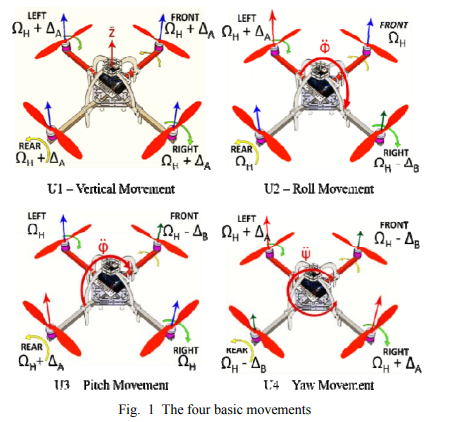

following image taken from https://www.researchgate.net/publication/318207689_Mass_Estimation_of_a_Quadcopter_Using_IMU_Data

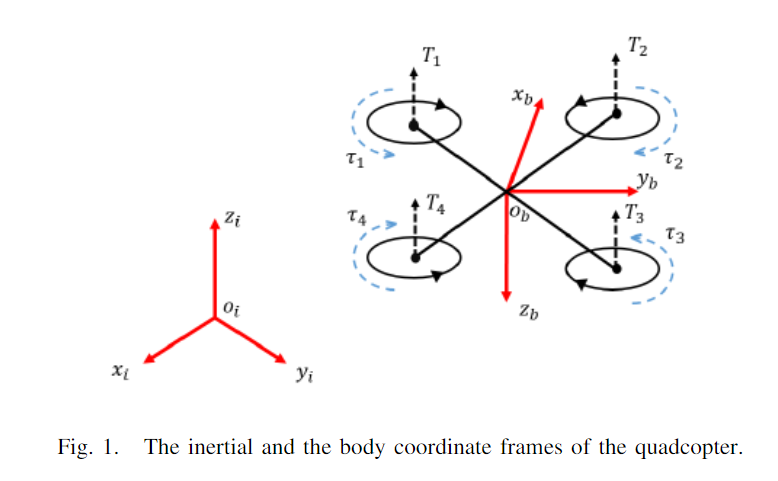

Earth's reference frame, Body's reference frame and Hybrid reference frame are the three reference frames considered in quadrotor modeling. Kinematics of a 6DOF rigid body is given by
$$
\dot{\zeta}=J_{\boldsymbol{\theta}} v
$$
Where, $\dot{\zeta}$ is the generalized velocity vector with respect to Earth's frame and $\boldsymbol{v}$ is the generalized velocity vector with respect to body frame. $\boldsymbol{J}_{\Theta}$ is the generalized matrix that transfers velocities of the body frame to Earth's frame. Dynamics of the quadrotor is given by the following NewtonEuler equation.
$$
\left[\begin{array}{cc}
m I_{3 \times 3} & 0_{3 \times 3} \\
0_{3 \times 3} & I
\end{array}\right]\left[\begin{array}{c}
\dot{V}^B \\
\dot{\omega}^B
\end{array}\right]+\left[\begin{array}{c}
\omega^B \times\left(m V^B\right) \\
\omega^B \times\left(I \omega^B\right)
\end{array}\right]=\left[\begin{array}{c}
F^B \\
\tau^B
\end{array}\right]
$$

where $\boldsymbol{m}$ is the mass of the quadrotor, $\boldsymbol{I}$ is the inertia tensor, $\boldsymbol{I}_{3 \times 3}$ is the $3 \times 3$ unity matrix, $\omega^B$ and $V^B$ are the angular and linear velocities of the quadrotor with respect to the body frame and $F^B$ and $\tau^B$ are the force and torque vectors. Following two assumptions are made to simplify the body dynamics.

1) Centre of mass of the quadrotor coincide with the origin of the body fixed frame.

2) Axes of the body frame coincide with the body principal axes of inertia

With the above assumptions the accelerations in the body frame can be derived as follows.
$$
\begin{aligned}
& \dot{u}=(v r-w q)+g \sin \theta \\
& \dot{v}=(w p-u r)+g \cos \theta \sin \phi \\
& \dot{w}=(u q-v p)-g(\sin \theta \sin \phi) \frac{U_1}{m} \\
& \dot{p}=\frac{I_{Y Y}-I_{Z Z}}{I_{X X}} q r-\frac{J_{T P}}{I_{X X}} q \Omega+\frac{U_2}{I_{X X}} \\
& \dot{q}=\frac{I_{Z Z}-I_{X X}}{I_{Y Y}} p r-\frac{J_{T P}}{I_{Y Y}} p \Omega+\frac{U_3}{I_{Y Y}} \\
& \dot{r}=\frac{I_{X X}-I_{Y Y}}{I_{Z Z}} p q+\frac{U_4}{I_{Z Z}}
\end{aligned}
$$
Where $\boldsymbol{\Omega}$ is the algebraic sum of the propeller speeds and $\boldsymbol{\Omega}$ is defined as

$$
\boldsymbol{\Omega}=-\boldsymbol{\Omega}_1+\boldsymbol{\Omega}_2-\boldsymbol{\Omega}_3+\boldsymbol{\Omega}_{\mathbf{4}}
$$
Equation (5) shows the relationship between the basic movements and the thrusts and torques generated by each propeller.
$$
\left[\begin{array}{l}
U_1 \\
U_2 \\
U_3 \\
U_4
\end{array}\right]=\left[\begin{array}{c}
T_1+T_2+T_3+T_4 \\
l\left(-T_2+T_4\right) \\
l\left(-T_1+T_3\right) \\
-\tau_1+\tau_2-\tau_3+\tau_4
\end{array}\right]------------------->(5)
$$

It is desirable to control the position of the quadrotor with respect to the Earth's frame and orientation with respect to the body frame. Therefore a hybrid frame is defined containing position in the Earth's frame and orientation in the body frame [4]. Velocity vector of the hybrid frame is given as
$$
\dot{\zeta}=\left[\begin{array}{llllll}
\dot{X} & \dot{Y} & \dot{Z} & p & \boldsymbol{q} & \boldsymbol{r}
\end{array}\right]
$$
The body equations in hybrid frame directly express the dynamics with the controls. The body equations can be derived as follows.

\begin{aligned}
\ddot{X} & =(\sin \psi \sin \phi+\cos \psi \sin \theta \cos \phi) \frac{U_1}{m} \\
\ddot{Y} & =(-\cos \psi \sin \phi+\sin \psi \sin \theta \cos \phi) \frac{U_1}{m} \\
\ddot{Z} & =-g+(\cos \theta \cos \phi) \frac{U_1}{m} \\
\dot{p} & =\frac{I_{Y Y}-I_{Z Z}}{I_{X X}} q r-\frac{J_{T P}}{I_{X X}} q \Omega+\frac{U_2}{I_{X X}} \\
\dot{q} & =\frac{I_{Z Z}-I_{X X}}{I_{Y Y}} p r-\frac{J_{T P}}{I_{Y Y}} p \Omega+\frac{U_3}{I_{Y Y}} \\
\dot{r} & =\frac{I_{X X}-I_{Y Y}}{I_{Z Z}} p q+\frac{U_4}{I_{Z Z}}
\end{aligned}

 ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------>(7)

**Using blade element theory (BET) and momentum theory**  it can be deduced that thrust and torque of a propeller are proportional to the square of the propeller speed. The constant of proportionality, thrust coefficient and the torque coefficient for the propellers were estimated. The relationship between propeller speeds and the motion is given in (8), where $b$ and $d$ are thrust coefficient and the torque coefficient.

$$
\left[\begin{array}{l}
U_1 \\
U_2 \\
U_3 \\
U_4
\end{array}\right]=\left[\begin{array}{c}
b\left(\Omega_1^2+\Omega_2^2+\Omega_3^2+\Omega_4^2\right) \\
b l\left(-\Omega_2^2+\Omega_4^2\right) \\
b l\left(-\Omega_1^2+\Omega_3^2\right) \\
d\left(-\Omega_1^2+\Omega_2^2-\Omega_3^2+\Omega_4^2\right)
\end{array}\right]------------------->(8)
$$

The role of the controller is to adjust the speed of four propellers such that a desired quadrotor orientation is achieved. The relationship between the basic movements of the quadrotor and the propeller speeds can be derived by (9) [7]. Where $l$ is the distance between opposite rotors.
$$
\left[\begin{array}{l}
\Omega_1^2 \\
\Omega_2^2 \\
\Omega_3^2 \\
\Omega_4^2
\end{array}\right]=\left[\begin{array}{c}
\frac{1}{4 b} U_1-\frac{1}{2 b l} U_3-\frac{1}{4 d} U_4 \\
\frac{1}{4 b} U_1-\frac{1}{2 b l} U_2+\frac{1}{4 d} U_4 \\
\frac{1}{4 b} U_1+\frac{1}{2 b l} U_3-\frac{1}{4 d} U_4 \\
\frac{1}{4 b} U_1+\frac{1}{2 b l} U_2+\frac{1}{4 d} U_4
\end{array}\right]-------------------->(9)
$$

assumptions were used to simplify the dynamic model of the quadrotor.
1. The cross coupling effects of angular speeds (Corioliscentripetal effect) and gyroscopic effects are negligible.
2. In hovering conditions the accelerations in the body frame are approximately equal to the accelerations in the earth frame.

With these assumptions quadrotor dynamics can be simplified as follows.
$$
\begin{aligned}
\ddot{X} & =-g+(\cos \theta \cos \phi) \frac{U_1}{m} \\
\dot{p} & =\frac{U_2}{I_{X X}} \\
\dot{q} & =\frac{U_3}{I_{Y Y}} \\
\dot{r} & =\frac{U_4}{I_{Z Z}}
\end{aligned}
$$

 Physical parameters that we consider when built the quadrotor

\begin{array}{|c|c|c|}
\hline \text { Parameter } & \text { Value } & \text { Units } \\
\hline \text { Mass } & m & \mathrm{~kg} \\
\hline \text { Motor to motor length } & l & \mathrm{~m} \\
\hline \text { Moment of Inertia } & & \\
\hline \mathrm{I}_{\mathrm{XX}} & \mathrm{I}_{\mathrm{XX}} & \mathrm{kgm}^2 \\
\hline \mathrm{I}_{\mathrm{YY}} & \mathrm{I}_{\mathrm{YY}} & \mathrm{kgm}^2 \\
\hline \mathrm{I}_{\mathrm{ZZ}} & \mathrm{I}_{\mathrm{ZZ}} & \mathrm{kgm}^2 \\
\hline \text { Motor constant } & c & \mathrm{rpm} / \mathrm{V} \\
\hline \text { Propeller parameters } & & \\
\hline \text { Thrust coefficient } & b & \mathrm{Ns}^2 \\
\hline \text { Torque coefficient } & d & \mathrm{Nms}^2 \\
\hline \text { Pitch } & p & \\
\hline
\end{array}

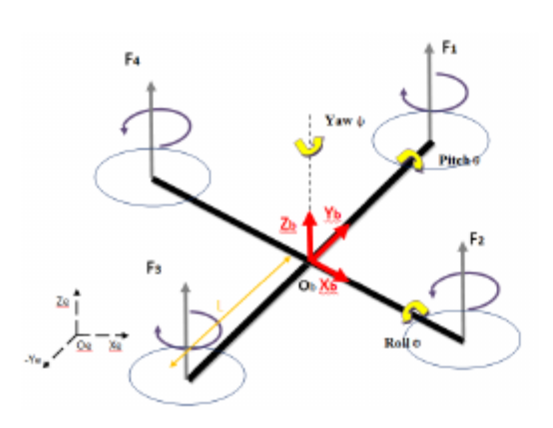

## Code

In [ ]:
def externalForceModel(qq,parameters,X):
  #Heavy Top Object
  M=parameters['M']; II=parameters['II']; g=parameters['g']; CM=parameters['CM'];
  R=X[0][0]; omega=X[1]; spi=R@ II@ R.T @ omega
  taue=np.array([0,0,0]);
   ##(-M*g*qq.hatMatrix(R@CM) @ [0,0,1])-0*spi;
  fe=np.array([0,0.,-M*g]);

  return [taue,fe]

def actuator(qq,parameters, t, X, taue,fe):
  #tauu=np.array([0,0,0]);
  #fu=np.array([0,0,0]);
  R=X[0][0];
  l1=1
  cd=0.005
  cl=0.01
  w1=10
  w2=5
  w3=10
  w4=10
  ts=np.array([[0,l1*cl,0,-l1*cl],[-l1*cl,0,l1*cl,0],[-cd,cd,-cd,cd]])
  ip_omega=np.array([[w1*w1],[w2*w2],[w3*w3],[w4*w4]])
  Tauu=ts@ip_omega
  tauu1=(R@Tauu)

  Fu_1=cl*(w1*w1+w2*w2+w3*w3+w4*w4)
  gamma=np.array([[0],[0],[1]])
  Fu=Fu_1*gamma
  fu1 =(R@Fu)
  a=fu1[0][0]
  b=fu1[1][0]
  c=fu1[2][0]
  fu=np.array([a,b,c])

  d=tauu1[0][0]
  e=tauu1[1][0]
  f=tauu1[2][0]
  tauu=np.array([d,e,f])


  return [tauu,fu]




In [ ]:
A=np.array([[4],[5],[6]])
a=A[0][0]
b=A[1][0]
c=A[2][0]

C=np.array([a,b,c])
B=np.array([1,1,1])

print(np.transpose(A))
print("\n")
print(C)


[[4 5 6]]


[4 5 6]


In [ ]:
mr=mugas_rigid_body_functions()

###Declare Initial conditions

In [ ]:
cubeDimensions = {'l': 2.0, 'w': 2.0, 'h': 0.5, 'xp': 1.0, 'yp': 1.0, 'zp': 0.25}
parameters = {
    'CM': np.array([cubeDimensions['l'] / 2 - cubeDimensions['xp'],
                    cubeDimensions['w'] / 2 - cubeDimensions['yp'],
                    cubeDimensions['h'] / 2 - cubeDimensions['zp']]),
    'g': 1,
    'M': 1,
    'II': np.array([[1.0, 0.0, 0.0],
                    [0.0, 1.0, 0.0],
                    [0.0, 0.0, 1.0]])
}

ICq=mr.qFromAxisAngles(0,np.array([1,0,0]));
ICR=mr.RfromQuaternions(ICq);
IComega=np.array([0.,0.,0.]);
ICo=np.array([0.,0.,0.]);
ICp=np.array([0.,0.,0.]);
ICXC=np.array([0,0,0]);
ICs=[[ICR,ICo],IComega,ICp,ICXC]


In [ ]:
ICp

array([0., 0., 0.])

In [ ]:
aa4=mr.simulating_a_cube(0.01, 10., cubeDimensions, parameters,ICs)
fig1=mr.animated_cube_flat_shading(aa4,'Rankine_AL')